In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Read the data
df = pd.read_csv('data_encoded.csv')

# Print column names to verify
print("Available columns in the dataset:")
for col in df.columns:
    print(f"- {col}")

X = df.drop(columns=['LapTimeSeconds'])
y = df['LapTimeSeconds']

# List of classifiers to try
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(500, 50), max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}




# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Dictionary to store results
results = {}

# Evaluate each classifier
for name, clf in classifiers.items():
    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')

    # Train the model and get predictions
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Store results
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_predictions': y_pred
    }

# Create visualizations
plt.figure(figsize=(12, 6))
cv_means = [results[name]['cv_mean'] for name in classifiers.keys()]
cv_stds = [results[name]['cv_std'] for name in classifiers.keys()]

# Plot average cross-validation scores
plt.bar(classifiers.keys(), cv_means, yerr=cv_stds)
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('Cross-validation Accuracy')
plt.tight_layout()

# Print detailed results
print("\nDetailed Model Performance Comparison:")
print("-" * 60)
for name in classifiers.keys():
    print(f"\n{name}:")
    print(f"Cross-validation Accuracy: {results[name]['cv_mean']:.3f} (+/- {results[name]['cv_std']*2:.3f})")
    print("\nClassification Report:")
    print(classification_report(y_test, results[name]['test_predictions']))

# Create confusion matrices for each classifier
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, (name, clf) in enumerate(classifiers.items()):
    cm = confusion_matrix(y_test, results[name]['test_predictions'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

plt.tight_layout()
plt.show()

# Identify best performing model
best_model = max(results.items(), key=lambda x: x[1]['cv_mean'])
print(f"\nBest performing model: {best_model[0]} with accuracy: {best_model[1]['cv_mean']:.3f}")

FileNotFoundError: [Errno 2] No such file or directory: 'data_encoded.csv'

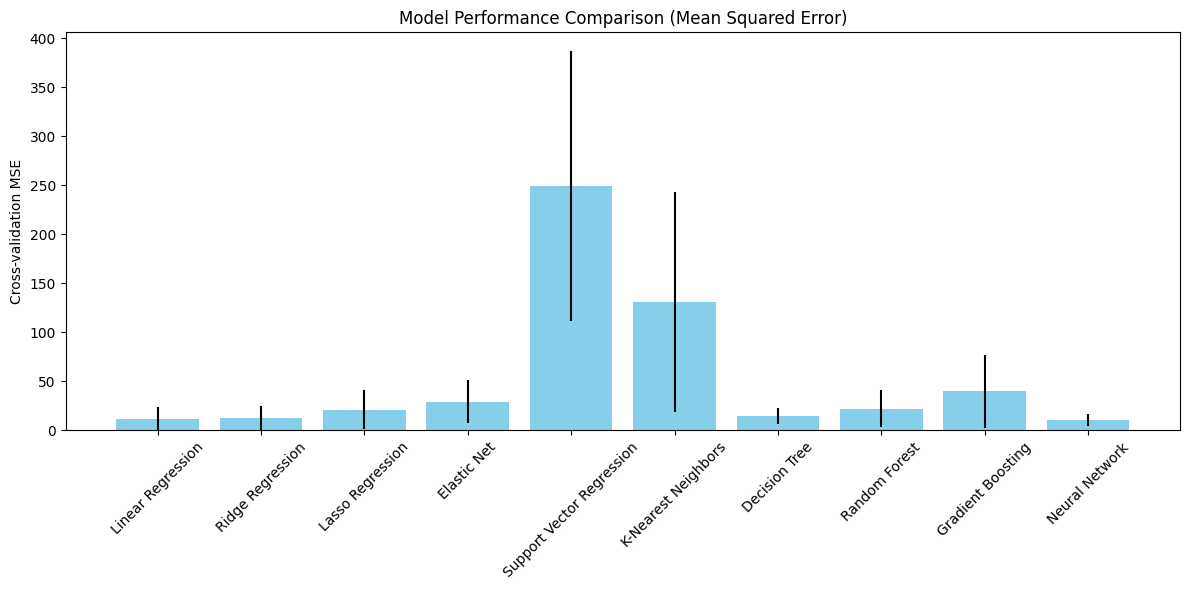


Detailed Model Performance Comparison:
------------------------------------------------------------

Linear Regression:
Cross-validation MSE: 12.095 (+/- 23.607)
Test Set MSE: 3.594
Test Set MAE: 1.170
R^2 Score: 0.979

Ridge Regression:
Cross-validation MSE: 12.323 (+/- 24.628)
Test Set MSE: 3.591
Test Set MAE: 1.175
R^2 Score: 0.979

Lasso Regression:
Cross-validation MSE: 21.111 (+/- 39.627)
Test Set MSE: 6.264
Test Set MAE: 1.797
R^2 Score: 0.964

Elastic Net:
Cross-validation MSE: 29.224 (+/- 44.069)
Test Set MSE: 8.522
Test Set MAE: 2.114
R^2 Score: 0.951

Support Vector Regression:
Cross-validation MSE: 249.168 (+/- 275.242)
Test Set MSE: 84.865
Test Set MAE: 7.397
R^2 Score: 0.515

K-Nearest Neighbors:
Cross-validation MSE: 131.024 (+/- 225.420)
Test Set MSE: 2.082
Test Set MAE: 0.751
R^2 Score: 0.988

Decision Tree:
Cross-validation MSE: 14.745 (+/- 17.103)
Test Set MSE: 1.968
Test Set MAE: 0.632
R^2 Score: 0.989

Random Forest:
Cross-validation MSE: 22.235 (+/- 37.885)
Test 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from model.model_train import X,y

import warnings
warnings.filterwarnings('ignore')

# Read the data
# df = pd.read_csv('data_encoded.csv')

# Print column names to verify
# print("Available columns in the dataset:")
# for col in df.columns:
#     print(f"- {col}")

# X = df.drop(columns=['LapTimeSeconds'])
# y = df['LapTimeSeconds']




from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of regressors to try
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(500, 50), max_iter=1000, random_state=42)
}

# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store results
results = {}

# Evaluate each classifier
for name, reg in regressors.items():

    cv_scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

    # Train the model and get predictions
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'cv_mean': -cv_scores.mean(),  # Take negative to get positive MSE
        'cv_std': cv_scores.std(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

# Create visualizations
plt.figure(figsize=(12, 6))
cv_means = [results[name]['cv_mean'] for name in regressors.keys()]
cv_stds = [results[name]['cv_std'] for name in regressors.keys()]

# Plot average cross-validation scores (MSE)
plt.bar(regressors.keys(), cv_means, yerr=cv_stds, color='skyblue')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison (Mean Squared Error)')
plt.ylabel('Cross-validation MSE')
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Model Performance Comparison:")
print("-" * 60)
for name in regressors.keys():
    print(f"\n{name}:")
    print(f"Cross-validation MSE: {results[name]['cv_mean']:.3f} (+/- {results[name]['cv_std']*2:.3f})")
    print(f"Test Set MSE: {results[name]['mse']:.3f}")
    print(f"Test Set MAE: {results[name]['mae']:.3f}")
    print(f"R^2 Score: {results[name]['r2']:.3f}")

# Identify best performing model based on R^2
best_model = max(results.items(), key=lambda x: x[1]['r2'])
print(f"\nBest performing model: {best_model[0]} with R^2: {best_model[1]['r2']:.3f}")